# **ETL (extract,transform & load) for UNIQLO website.**

**GROUP MEMBERS:**

ILIANA HANIN BINTI RUSLI (A193127)

NUR ‘EIZA ATHIRA BINTI EIKHMERIZAL BAZURA (A195719)

INTAN HUMAIRA BINTI MOHAMMAD FYAIZUL (A195442)

YONG ZI XIAN (A194982)

<br>


---





# **(1) EXTRACT**

Lists of Attributes:

1.   Product Link
2.   Product Name
3.   Product Price
4.   Product Category Gender
5.   Product Size
6.   Product Rating
7.   Product Review Count
8.   Product Status









In [ ]:
!apt-get update -y
!apt-get install -y wget curl unzip
!apt-get install -y libnss3 libgconf-2-4 libgdk-pixbuf2.0-0 libxss1 libappindicator3-1 libasound2 libatk-bridge2.0-0 libatk1.0-0 libx11-xcb1
!pip install selenium
!pip install webdriver-manager


Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://dl.google.com/linux/chrome/deb stable InRelease [1,825 B]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:9 https://dl.google.com/linux/chrome/deb stable/main amd64 Packages [1,213 B]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:12 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [62.9 kB]
Hit:13 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy I

In [ ]:
# Download and install Google Chrome
!wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
!dpkg -i google-chrome-stable_current_amd64.deb
!apt --fix-broken install -y

# Install dependencies for Chrome
!apt-get install -y libx11-dev libx11-xcb1 libxcb-dri3-0 libgdk-pixbuf2.0-0


--2025-01-29 15:18:10--  https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
Resolving dl.google.com (dl.google.com)... 173.194.215.190, 173.194.215.93, 173.194.215.91, ...
Connecting to dl.google.com (dl.google.com)|173.194.215.190|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 112524488 (107M) [application/x-debian-package]
Saving to: ‘google-chrome-stable_current_amd64.deb’

google-chrome-stabl 100%[===================>] 107.31M   148MB/s    in 0.7s    

2025-01-29 15:18:11 (148 MB/s) - ‘google-chrome-stable_current_amd64.deb’ saved [112524488/112524488]

Selecting previously unselected package google-chrome-stable.
(Reading database ... 124788 files and directories currently installed.)
Preparing to unpack google-chrome-stable_current_amd64.deb ...
Unpacking google-chrome-stable (132.0.6834.159-1) ...
dpkg: dependency problems prevent configuration of google-chrome-stable:
 google-chrome-stable depends on libvulkan1; however:
  Packa

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [ ]:
# Set up Chrome options for headless mode
chrome_options = Options()
chrome_options.add_argument('--headless')  # Run in headless mode
chrome_options.add_argument('--no-sandbox')  # Disable sandboxing (necessary in Colab)
chrome_options.add_argument('--disable-dev-shm-usage')  # Overcome limited shared memory in Colab
chrome_options.add_argument('--remote-debugging-port=9222')  # Avoid DevToolsActivePort error

In [ ]:
# Set up the ChromeDriver service
service = Service(ChromeDriverManager().install())

In [ ]:
# Import the required libraries
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.service import Service

# Instantiate a Chrome options object
options = webdriver.ChromeOptions()
options.add_argument("--headless=new")  # Use headless mode

# Initialize the Chrome WebDriver (reused for all pages)
driver = webdriver.Chrome(service=service, options=chrome_options)

# **Attribute 1: Product Link**

In [ ]:
import time

# Initialize the Chrome WebDriver (reused for all pages)
driver = webdriver.Chrome(service=service, options=chrome_options)

# List of URLs to scrape
uniqlo_urls = [
    "https://www.uniqlo.com/my/en/women/lifewear-collection/outerwear",
    "https://www.uniqlo.com/my/en/women/lifewear-collection/bottoms",
    "https://www.uniqlo.com/my/en/women/lifewear-collection/dresses",
    "https://www.uniqlo.com/my/en/women/lifewear-collection/t-shirts",
    "https://www.uniqlo.com/my/en/women/lifewear-collection/shirts",
    "https://www.uniqlo.com/my/en/women/lifewear-collection/sweat-wear",
    "https://www.uniqlo.com/my/en/women/lifewear-collection/knitwear",
    "https://www.uniqlo.com/my/en/women/lifewear-collection/loungewear"
]

# Function to fetch product links from a given URL
def fetch_product_links(url):
    try:
        print(f"Fetching product links from: {url}")
        driver.get(url)

        # Wait for the product containers to load
        WebDriverWait(driver, 10).until(
            EC.presence_of_all_elements_located((By.CSS_SELECTOR, "article a"))
        )

        # Locate all product containers
        product_containers = driver.find_elements(By.CSS_SELECTOR, "article a")

        # List to store product links
        product_links = []

        # Loop through each product container
        for product in product_containers:
            try:
                # Extract the href attribute
                product_link = product.get_attribute("href")
                if product_link and product_link not in product_links:  # Avoid duplicates
                    product_links.append(product_link)
            except Exception as e:
                print(f"Error extracting product link: {e}")
                continue

        return product_links

    except Exception as e:
        print(f"Error fetching product links from {url}: {e}")
        return []

# Scrape product links from all URLs
all_product_links = []
for url in uniqlo_urls:
    product_links = fetch_product_links(url)
    all_product_links.extend(product_links)

# Print the collected product links with numbering
for index, product_link in enumerate(all_product_links, start=1):
    print(f"Product Link {index}: {product_link}")



Fetching product links from: https://www.uniqlo.com/my/en/women/lifewear-collection/outerwear
Fetching product links from: https://www.uniqlo.com/my/en/women/lifewear-collection/bottoms
Fetching product links from: https://www.uniqlo.com/my/en/women/lifewear-collection/dresses
Fetching product links from: https://www.uniqlo.com/my/en/women/lifewear-collection/t-shirts
Fetching product links from: https://www.uniqlo.com/my/en/women/lifewear-collection/shirts
Fetching product links from: https://www.uniqlo.com/my/en/women/lifewear-collection/sweat-wear
Fetching product links from: https://www.uniqlo.com/my/en/women/lifewear-collection/knitwear
Fetching product links from: https://www.uniqlo.com/my/en/women/lifewear-collection/loungewear
Product Link 1: https://www.uniqlo.com/my/en/products/E474895-000
Product Link 2: https://www.uniqlo.com/my/en/products/E474175-000
Product Link 3: https://www.uniqlo.com/my/en/products/E474560-000
Product Link 4: https://www.uniqlo.com/my/en/products/E47

# **Attribute 2: Product Name**

In [ ]:
import time

# Initialize the Chrome WebDriver (reused for all pages)
driver = webdriver.Chrome(service=service, options=chrome_options)

# List of URLs to scrape
uniqlo_urls = [
    "https://www.uniqlo.com/my/en/women/lifewear-collection/outerwear",
    "https://www.uniqlo.com/my/en/women/lifewear-collection/bottoms",
    "https://www.uniqlo.com/my/en/women/lifewear-collection/dresses",
    "https://www.uniqlo.com/my/en/women/lifewear-collection/t-shirts",
    "https://www.uniqlo.com/my/en/women/lifewear-collection/shirts",
    "https://www.uniqlo.com/my/en/women/lifewear-collection/sweat-wear",
    "https://www.uniqlo.com/my/en/women/lifewear-collection/knitwear",
    "https://www.uniqlo.com/my/en/women/lifewear-collection/loungewear"
]

# Function to fetch product names from a given URL
def fetch_product_names(url):
    try:
        print(f"Fetching product links from: {url}")
        driver.get(url)

        # Wait for the product containers to load
        WebDriverWait(driver, 10).until(
            EC.presence_of_all_elements_located((By.CSS_SELECTOR, "article a"))
        )

        # Locate all product containers
        product_containers = driver.find_elements(By.CSS_SELECTOR, "article a")

        # List to store product links
        product_names = []

       # Loop through each product container
        for product in product_containers:
            try:
                # Extract product name
                product_name = product.find_element(By.CSS_SELECTOR, ".product-tile-product-description").text
                product_names.append(product_name)
            except Exception as e:
                print(f"Error extracting product name: {e}")
                continue

        # Return the list of product names
        return product_names

    except Exception as e:
        print(f"Error fetching product links from {url}: {e}")
        return []

# Scrape product links from all URLs
all_product_names = []
for url in uniqlo_urls:
    product_names = fetch_product_names(url)
    all_product_names.extend(product_names)

# Print the collected product links with numbering
for index, product_names in enumerate(all_product_names, start=1):
    print(f"Product Name {index}: {product_names}")



Fetching product links from: https://www.uniqlo.com/my/en/women/lifewear-collection/outerwear
Fetching product links from: https://www.uniqlo.com/my/en/women/lifewear-collection/bottoms
Fetching product links from: https://www.uniqlo.com/my/en/women/lifewear-collection/dresses
Fetching product links from: https://www.uniqlo.com/my/en/women/lifewear-collection/t-shirts
Fetching product links from: https://www.uniqlo.com/my/en/women/lifewear-collection/shirts
Fetching product links from: https://www.uniqlo.com/my/en/women/lifewear-collection/sweat-wear
Fetching product links from: https://www.uniqlo.com/my/en/women/lifewear-collection/knitwear
Fetching product links from: https://www.uniqlo.com/my/en/women/lifewear-collection/loungewear
Product Name 1: Pocketable UV Protection Parka | Pattern
Product Name 2: Pocketable UV Protection Parka
Product Name 3: Miracle Air Jacket | Relaxed Fit | Co-ord
Product Name 4: Windproof Vest
Product Name 5: Denim Oversized Jacket
Product Name 6: Windpro

# **Attribute 3: Product Price**

In [ ]:
import time

# Initialize the Chrome WebDriver (reused for all pages)
driver = webdriver.Chrome(service=service, options=chrome_options)

# List of URLs to scrape
uniqlo_urls = [
    "https://www.uniqlo.com/my/en/women/lifewear-collection/outerwear",
    "https://www.uniqlo.com/my/en/women/lifewear-collection/bottoms",
    "https://www.uniqlo.com/my/en/women/lifewear-collection/dresses",
    "https://www.uniqlo.com/my/en/women/lifewear-collection/t-shirts",
    "https://www.uniqlo.com/my/en/women/lifewear-collection/shirts",
    "https://www.uniqlo.com/my/en/women/lifewear-collection/sweat-wear",
    "https://www.uniqlo.com/my/en/women/lifewear-collection/knitwear",
    "https://www.uniqlo.com/my/en/women/lifewear-collection/loungewear"
]

# Function to fetch product prices from a given URL
def fetch_product_prices(url):
    try:
        print(f"Fetching product prices from: {url}")
        driver.get(url)

        # Wait for the product containers to load
        WebDriverWait(driver, 10).until(
            EC.presence_of_all_elements_located((By.CSS_SELECTOR, "article a"))
        )

        # Locate all product containers
        product_containers = driver.find_elements(By.CSS_SELECTOR, "article a")

        # List to store product prices
        product_prices = []

        # Loop through each product container
        for product in product_containers:
            try:
                # Extract product price
                price_element = product.find_element(By.CSS_SELECTOR, ".price-original-ER")
                if price_element:
                    product_price = price_element.text.replace("\n", "").strip()
                else:
                    product_price = "No price"  # Default if no price found

                # Append the product price to the list
                product_prices.append(product_price)
            except Exception:
                # If an error occurs (price element not found), append "No price"
                product_prices.append("No price")

        # Return the list of product prices
        return product_prices

    except Exception as e:
        print(f"Error fetching product prices from {url}: {e}")
        return []

# Scrape product prices from all URLs
all_product_prices = []
for url in uniqlo_urls:
    product_prices = fetch_product_prices(url)
    all_product_prices.extend(product_prices)

# Print the collected product prices with numbering
for index, product_price in enumerate(all_product_prices, start=1):
    print(f"Product Price {index}: {product_price}")


Fetching product prices from: https://www.uniqlo.com/my/en/women/lifewear-collection/outerwear
Fetching product prices from: https://www.uniqlo.com/my/en/women/lifewear-collection/bottoms
Fetching product prices from: https://www.uniqlo.com/my/en/women/lifewear-collection/dresses
Fetching product prices from: https://www.uniqlo.com/my/en/women/lifewear-collection/t-shirts
Fetching product prices from: https://www.uniqlo.com/my/en/women/lifewear-collection/shirts
Fetching product prices from: https://www.uniqlo.com/my/en/women/lifewear-collection/sweat-wear
Fetching product prices from: https://www.uniqlo.com/my/en/women/lifewear-collection/knitwear
Fetching product prices from: https://www.uniqlo.com/my/en/women/lifewear-collection/loungewear
Product Price 1: RM149.90
Product Price 2: RM149.90
Product Price 3: RM249.90
Product Price 4: RM129.90
Product Price 5: RM199.90
Product Price 6: RM249.90
Product Price 7: RM149.90
Product Price 8: RM149.90
Product Price 9: RM99.90
Product Price 

# **Attribute 4: Product Category Gender**

In [ ]:
import time

# Initialize the Chrome WebDriver (reused for all pages)
driver = webdriver.Chrome(service=service, options=chrome_options)

# List of URLs to scrape
uniqlo_urls = [
    "https://www.uniqlo.com/my/en/women/lifewear-collection/outerwear",
    "https://www.uniqlo.com/my/en/women/lifewear-collection/bottoms",
    "https://www.uniqlo.com/my/en/women/lifewear-collection/dresses",
    "https://www.uniqlo.com/my/en/women/lifewear-collection/t-shirts",
    "https://www.uniqlo.com/my/en/women/lifewear-collection/shirts",
    "https://www.uniqlo.com/my/en/women/lifewear-collection/sweat-wear",
    "https://www.uniqlo.com/my/en/women/lifewear-collection/knitwear",
    "https://www.uniqlo.com/my/en/women/lifewear-collection/loungewear",
]

# Function to fetch product sizes from a given URL
def fetch_product_cgender(url):
    try:
        print(f"Fetching product Category Gender from: {url}")
        driver.get(url)

        # Wait for the product containers to load
        WebDriverWait(driver, 10).until(
            EC.presence_of_all_elements_located((By.CSS_SELECTOR, "article"))
        )

        # Locate all product containers
        product_containers = driver.find_elements(By.CSS_SELECTOR, "article")

        # List to store product cgender
        product_cgenders = []

        # Loop through each product container
        for product in product_containers:
            try:
                # Extract product Category Gender
                cgender_element = product.find_element(By.CSS_SELECTOR, ".product-tile-category-item-gender")
                product_cgender = cgender_element.text.strip()
                product_cgenders.append(product_cgender)
            except:
                # Skip silently if Category Gender element is not found
                continue

        # Return the list of product sizes
        return product_cgenders

    except Exception as e:
        print(f"Error fetching product category gender from {url}: {e}")
        return []

# Scrape product category gender from all URLs
all_product_cgenders = []
for url in uniqlo_urls:
    product_cgenders = fetch_product_cgender(url)
    all_product_cgenders.extend(product_cgenders)

# Print the collected product sizes with numbering
for index, product_cgender in enumerate(all_product_cgenders, start=1):
    print(f"Product Category Gender {index}: {product_cgender}")


Fetching product Category Gender from: https://www.uniqlo.com/my/en/women/lifewear-collection/outerwear
Fetching product Category Gender from: https://www.uniqlo.com/my/en/women/lifewear-collection/bottoms
Fetching product Category Gender from: https://www.uniqlo.com/my/en/women/lifewear-collection/dresses
Fetching product Category Gender from: https://www.uniqlo.com/my/en/women/lifewear-collection/t-shirts
Fetching product Category Gender from: https://www.uniqlo.com/my/en/women/lifewear-collection/shirts
Fetching product Category Gender from: https://www.uniqlo.com/my/en/women/lifewear-collection/sweat-wear
Fetching product Category Gender from: https://www.uniqlo.com/my/en/women/lifewear-collection/knitwear
Fetching product Category Gender from: https://www.uniqlo.com/my/en/women/lifewear-collection/loungewear
Product Category Gender 1: WOMEN
Product Category Gender 2: WOMEN
Product Category Gender 3: WOMEN
Product Category Gender 4: UNISEX
Product Category Gender 5: WOMEN
Product C

# **Attribute 5: Product Size**

In [ ]:
import time

# Initialize the Chrome WebDriver (reused for all pages)
driver = webdriver.Chrome(service=service, options=chrome_options)

# List of URLs to scrape
uniqlo_urls = [
    "https://www.uniqlo.com/my/en/women/lifewear-collection/outerwear",
    "https://www.uniqlo.com/my/en/women/lifewear-collection/bottoms",
    "https://www.uniqlo.com/my/en/women/lifewear-collection/dresses",
    "https://www.uniqlo.com/my/en/women/lifewear-collection/t-shirts",
    "https://www.uniqlo.com/my/en/women/lifewear-collection/shirts",
    "https://www.uniqlo.com/my/en/women/lifewear-collection/sweat-wear",
    "https://www.uniqlo.com/my/en/women/lifewear-collection/knitwear",
    "https://www.uniqlo.com/my/en/women/lifewear-collection/loungewear",
]

# Function to fetch product sizes from a given URL
def fetch_product_sizes(url):
    try:
        print(f"Fetching product sizes from: {url}")
        driver.get(url)

        # Wait for the product containers to load
        WebDriverWait(driver, 10).until(
            EC.presence_of_all_elements_located((By.CSS_SELECTOR, "article"))
        )

        # Locate all product containers
        product_containers = driver.find_elements(By.CSS_SELECTOR, "article")

        # List to store product sizes
        product_sizes = []

        # Loop through each product container
        for product in product_containers:
            try:
                # Extract product size
                size_element = product.find_element(By.CSS_SELECTOR, ".product-tile-category-item-size")
                product_size = size_element.text.strip()
                product_sizes.append(product_size)
            except:
                # Skip silently if size element is not found
                continue

        # Return the list of product sizes
        return product_sizes

    except Exception as e:
        print(f"Error fetching product sizes from {url}: {e}")
        return []

# Scrape product sizes from all URLs
all_product_sizes = []
for url in uniqlo_urls:
    product_sizes = fetch_product_sizes(url)
    all_product_sizes.extend(product_sizes)

# Print the collected product sizes with numbering
for index, product_size in enumerate(all_product_sizes, start=1):
    print(f"Product Size {index}: {product_size}")


Fetching product sizes from: https://www.uniqlo.com/my/en/women/lifewear-collection/outerwear
Fetching product sizes from: https://www.uniqlo.com/my/en/women/lifewear-collection/bottoms
Fetching product sizes from: https://www.uniqlo.com/my/en/women/lifewear-collection/dresses
Fetching product sizes from: https://www.uniqlo.com/my/en/women/lifewear-collection/t-shirts
Fetching product sizes from: https://www.uniqlo.com/my/en/women/lifewear-collection/shirts
Fetching product sizes from: https://www.uniqlo.com/my/en/women/lifewear-collection/sweat-wear
Fetching product sizes from: https://www.uniqlo.com/my/en/women/lifewear-collection/knitwear
Fetching product sizes from: https://www.uniqlo.com/my/en/women/lifewear-collection/loungewear
Product Size 1: XS-XXL
Product Size 2: XS-XXL
Product Size 3: XS-XXL
Product Size 4: XS-XXL
Product Size 5: XS-XXL
Product Size 6: XS-XXL
Product Size 7: XS-XXL
Product Size 8: 22inch-32inch
Product Size 9: XS-3XL
Product Size 10: XS-3XL
Product Size 11: 

# **Attribute 6: Product Rating**

In [ ]:
import time

# Initialize the Chrome WebDriver (reused for all pages)
driver = webdriver.Chrome(service=service, options=chrome_options)

# List of URLs to scrape
uniqlo_urls = [
    "https://www.uniqlo.com/my/en/women/lifewear-collection/outerwear",
    "https://www.uniqlo.com/my/en/women/lifewear-collection/bottoms",
    "https://www.uniqlo.com/my/en/women/lifewear-collection/dresses",
    "https://www.uniqlo.com/my/en/women/lifewear-collection/t-shirts",
    "https://www.uniqlo.com/my/en/women/lifewear-collection/shirts",
    "https://www.uniqlo.com/my/en/women/lifewear-collection/sweat-wear",
    "https://www.uniqlo.com/my/en/women/lifewear-collection/knitwear",
    "https://www.uniqlo.com/my/en/women/lifewear-collection/loungewear",
]

# Function to fetch product ratings from a given URL
def fetch_product_ratings(url):
    try:
        print(f"Fetching product ratings from: {url}")
        driver.get(url)

        # Wait for the product containers to load
        WebDriverWait(driver, 10).until(
            EC.presence_of_all_elements_located((By.CSS_SELECTOR, "article"))
        )

        # Locate all product containers
        product_containers = driver.find_elements(By.CSS_SELECTOR, "article")

        # List to store product ratings
        product_ratings = []

        # Loop through each product container
        for product in product_containers:
            try:
                # Extract product rating
                rating_element = product.find_element(By.CSS_SELECTOR, "span.bold.ml-xxxs.small-rating")
                rating = rating_element.text.strip() if rating_element.text else "No rating"

                # If no rating found, append "No rating"
                if not rating:
                    rating = "No rating"

                product_ratings.append(rating)
            except Exception:
                # If rating element is not found, append "No rating"
                product_ratings.append("No rating")

        # Return the list of product ratings
        return product_ratings

    except Exception as e:
        print(f"Error fetching product ratings from {url}: {e}")
        return []

# Scrape product ratings from all URLs
all_product_ratings = []
for url in uniqlo_urls:
    product_ratings = fetch_product_ratings(url)
    all_product_ratings.extend(product_ratings)

# Print the collected product ratings with numbering
for index, rating in enumerate(all_product_ratings, start=1):
    print(f"Product Rating {index}: {rating}")

Fetching product ratings from: https://www.uniqlo.com/my/en/women/lifewear-collection/outerwear
Fetching product ratings from: https://www.uniqlo.com/my/en/women/lifewear-collection/bottoms
Fetching product ratings from: https://www.uniqlo.com/my/en/women/lifewear-collection/dresses
Fetching product ratings from: https://www.uniqlo.com/my/en/women/lifewear-collection/t-shirts
Fetching product ratings from: https://www.uniqlo.com/my/en/women/lifewear-collection/shirts
Fetching product ratings from: https://www.uniqlo.com/my/en/women/lifewear-collection/sweat-wear
Fetching product ratings from: https://www.uniqlo.com/my/en/women/lifewear-collection/knitwear
Fetching product ratings from: https://www.uniqlo.com/my/en/women/lifewear-collection/loungewear
Product Rating 1: No rating
Product Rating 2: 4.9
Product Rating 3: 5.0
Product Rating 4: 5.0
Product Rating 5: 5.0
Product Rating 6: 5.0
Product Rating 7: 5.0
Product Rating 8: 4.8
Product Rating 9: 4.8
Product Rating 10: 2.0
Product Rati

# **Attribute 7: Product Review Count**

In [ ]:
import time

# Initialize the Chrome WebDriver (reused for all pages)
driver = webdriver.Chrome(service=service, options=chrome_options)

# List of URLs to scrape
uniqlo_urls = [
    "https://www.uniqlo.com/my/en/women/lifewear-collection/outerwear",
    "https://www.uniqlo.com/my/en/women/lifewear-collection/bottoms",
    "https://www.uniqlo.com/my/en/women/lifewear-collection/dresses",
    "https://www.uniqlo.com/my/en/women/lifewear-collection/t-shirts",
    "https://www.uniqlo.com/my/en/women/lifewear-collection/shirts",
    "https://www.uniqlo.com/my/en/women/lifewear-collection/sweat-wear",
    "https://www.uniqlo.com/my/en/women/lifewear-collection/knitwear",
    "https://www.uniqlo.com/my/en/women/lifewear-collection/loungewear",
]

# Function to fetch review counts from a given URL
def fetch_review_count(url):
    try:
        print(f"Fetching review counts from: {url}")
        driver.get(url)

        # Wait for the product containers to load
        WebDriverWait(driver, 10).until(
            EC.presence_of_all_elements_located((By.CSS_SELECTOR, "article"))
        )

        # Locate all product containers
        product_containers = driver.find_elements(By.CSS_SELECTOR, "article")

        # List to store review counts
        review_counts = []

        # Loop through each product container
        for product in product_containers:
            try:
                # Extract review count (using the review count span if it exists)
                review_count_element = product.find_element(By.CSS_SELECTOR, "span.fr-review-count span")
                review_count = review_count_element.text if review_count_element else "No review"  # Default to "No review" if no reviews
                review_counts.append(review_count)

            except Exception:
                # If review element is not found, append "No review"
                review_counts.append("No review")

        # Return the list of review counts
        return review_counts

    except Exception as e:
        print(f"Error fetching review counts from {url}: {e}")
        return []

# Scrape review counts from all URLs
all_review_counts = []
for url in uniqlo_urls:
    review_counts = fetch_review_count(url)
    all_review_counts.extend(review_counts)

# Print the collected review counts with numbering
for index, review_count in enumerate(all_review_counts, start=1):
    print(f"Product Review Count {index}: {review_count}")

Fetching review counts from: https://www.uniqlo.com/my/en/women/lifewear-collection/outerwear
Fetching review counts from: https://www.uniqlo.com/my/en/women/lifewear-collection/bottoms
Fetching review counts from: https://www.uniqlo.com/my/en/women/lifewear-collection/dresses
Fetching review counts from: https://www.uniqlo.com/my/en/women/lifewear-collection/t-shirts
Fetching review counts from: https://www.uniqlo.com/my/en/women/lifewear-collection/shirts
Fetching review counts from: https://www.uniqlo.com/my/en/women/lifewear-collection/sweat-wear
Fetching review counts from: https://www.uniqlo.com/my/en/women/lifewear-collection/knitwear
Fetching review counts from: https://www.uniqlo.com/my/en/women/lifewear-collection/loungewear
Product Review Count 1: No review
Product Review Count 2: (7)
Product Review Count 3: (3)
Product Review Count 4: (1)
Product Review Count 5: (2)
Product Review Count 6: (2)
Product Review Count 7: (197)
Product Review Count 8: (127)
Product Review Count 

# **Attribute 8: Product Status**

In [ ]:
import time

# Initialize the Chrome WebDriver (reused for all pages)
driver = webdriver.Chrome(service=service, options=chrome_options)

# List of URLs to scrape
uniqlo_urls = [
    "https://www.uniqlo.com/my/en/women/lifewear-collection/outerwear",
    "https://www.uniqlo.com/my/en/women/lifewear-collection/bottoms",
    "https://www.uniqlo.com/my/en/women/lifewear-collection/dresses",
    "https://www.uniqlo.com/my/en/women/lifewear-collection/t-shirts",
    "https://www.uniqlo.com/my/en/women/lifewear-collection/shirts",
    "https://www.uniqlo.com/my/en/women/lifewear-collection/sweat-wear",
    "https://www.uniqlo.com/my/en/women/lifewear-collection/knitwear",
    "https://www.uniqlo.com/my/en/women/lifewear-collection/loungewear",
]

# Function to fetch review counts from a given URL
def fetch_status(url):
    try:
        print(f"Fetching product status from: {url}")
        driver.get(url)

        # Wait for the product containers to load
        WebDriverWait(driver, 10).until(
            EC.presence_of_all_elements_located((By.CSS_SELECTOR, "article"))
        )

        # Locate all product containers
        product_containers = driver.find_elements(By.CSS_SELECTOR, "article")

        # List to store review counts
        availability = []

        # Loop through each product container
        for product in product_containers:
            try:
                # Extract review count (using the review count span if it exists)
                available_element = product.find_element(By.CSS_SELECTOR, ".fr-status-flag-text")
                available = available_element.text if available_element else "No Status"
                availability.append(available)

            except Exception:
                # If review element is not found, append "No review"
                availability.append("No Status")

        # Return the list of review counts
        return availability

    except Exception as e:
        print(f"Error fetching status from {url}: {e}")
        return []

# Scrape review counts from all URLs
all_availability = []
for url in uniqlo_urls:
    availability = fetch_status(url)
    all_availability.extend(availability)

# Print the collected review counts with numbering
for index, availability in enumerate(all_availability, start=1):
    print(f"Product Status {index}: {availability}")

Fetching product status from: https://www.uniqlo.com/my/en/women/lifewear-collection/outerwear
Fetching product status from: https://www.uniqlo.com/my/en/women/lifewear-collection/bottoms
Fetching product status from: https://www.uniqlo.com/my/en/women/lifewear-collection/dresses
Fetching product status from: https://www.uniqlo.com/my/en/women/lifewear-collection/t-shirts
Fetching product status from: https://www.uniqlo.com/my/en/women/lifewear-collection/shirts
Fetching product status from: https://www.uniqlo.com/my/en/women/lifewear-collection/sweat-wear
Fetching product status from: https://www.uniqlo.com/my/en/women/lifewear-collection/knitwear
Fetching product status from: https://www.uniqlo.com/my/en/women/lifewear-collection/loungewear
Product Status 1: No Status
Product Status 2: Made from recycled materials.
Product Status 3: No Status
Product Status 4: No Status
Product Status 5: Limited Store
Product Status 6: No Status
Product Status 7: No Status
Product Status 8: No Status

In [ ]:
import pandas as pd


# Combine the data into a single DataFrame
data = {
    "Name": all_product_names,
    "Price": all_product_prices,
    "Size": all_product_sizes,
    "Category Gender": all_product_cgenders,
    "Rating": all_product_ratings,
    "Review Count": all_review_counts,
    "Status": all_availability,
    "Product Link": all_product_links
}

df = pd.DataFrame(data)

# Save the DataFrame to a single CSV file
df.to_csv("uniqlo2025.csv", index=False)

# Print the DataFrame to confirm
print(df)


                                          Name     Price    Size  \
0     Pocketable UV Protection Parka | Pattern  RM149.90  XS-XXL   
1               Pocketable UV Protection Parka  RM149.90  XS-XXL   
2    Miracle Air Jacket | Relaxed Fit | Co-ord  RM249.90  XS-XXL   
3                               Windproof Vest  RM129.90  XS-XXL   
4                       Denim Oversized Jacket  RM199.90  XS-XXL   
..                                         ...       ...     ...   
119        Washable Knit Ribbed Pants | Co-ord   RM99.90  XS-3XL   
120                 Cotton Relaxed Ankle Pants   RM79.90  XS-3XL   
121                 Cotton Easy Shorts | Print   RM59.90  XS-3XL   
122                 Cotton Easy Shorts | Denim   RM59.90  XS-3XL   
123                         Cotton Easy Shorts   RM59.90  XS-3XL   

    Category Gender     Rating Review Count                         Status  \
0             WOMEN  No rating    No review                      No Status   
1             WOMEN        

In [ ]:
# Calculate the total number of products
product_count = len(df)  # or df.shape[0] for the number of rows
print(f"Total number of products: {product_count}")


Total number of products: 124


**Details of the extracted data using Tabulate**

In [ ]:
from tabulate import tabulate
# Function to tabulate the data
def tabulate_dataframe(df):
    # Use tabulate to create a table with headers
    df.index = range(1, len(df) + 1)  # Adjust index to start from 1
    table = tabulate(df, headers="keys", tablefmt="grid", showindex=True)
    print(table)


tabulate_dataframe(df)

+-----+--------------------------------------------------------+----------+---------------+-------------------+-----------+----------------+----------------------------------------------+---------------------------------------------------+
|     | Name                                                   | Price    | Size          | Category Gender   | Rating    | Review Count   | Status                                       | Product Link                                      |
+=====+========================================================+==========+===============+===================+===========+================+==============================================+===================================================+
|   1 | Pocketable UV Protection Parka | Pattern               | RM149.90 | XS-XXL        | WOMEN             | No rating | No review      | No Status                                    | https://www.uniqlo.com/my/en/products/E474895-000 |
+-----+---------------------------------

# **(2) TRANSFORM**

a) 4 types of data processing

b) at least 2 or more data visualisation (e.g before and after data cleaning)

In [1]:
import pandas as pd

uniqlo = pd.read_csv('uniqlo2025.csv')

In [2]:
uniqlo

,Name,Price,Size,Category Gender,Rating,Review Count,Status,Product Link
0,Pocketable UV Protection Parka | Pattern,RM149.90,XS-XXL,WOMEN,No rating,No review,No Status,https://www.uniqlo.com/my/en/products/E474895-000
1,Pocketable UV Protection Parka,RM149.90,XS-XXL,WOMEN,4.9,(7),Made from recycled materials.,https://www.uniqlo.com/my/en/products/E474175-000
2,Miracle Air Jacket | Relaxed Fit | Co-ord,RM249.90,XS-XXL,WOMEN,5.0,(3),No Status,https://www.uniqlo.com/my/en/products/E474560-000
3,Windproof Vest,RM129.90,XS-XXL,UNISEX,5.0,(1),No Status,https://www.uniqlo.com/my/en/products/E476521-000
4,Denim Oversized Jacket,RM199.90,XS-XXL,WOMEN,5.0,(2),Limited Store,https://www.uniqlo.com/my/en/products/E474564-000
...,...,...,...,...,...,...,...,...
119,Washable Knit Ribbed Pants | Co-ord,RM99.90,XS-3XL,WOMEN,4.8,(148),No Status,https://www.uniqlo.com/my/en/products/E470173-000
120,Cotton Relaxed Ankle Pants,RM79.90,XS-3XL,WOMEN,4.8,(981),No Status,https://www.uniqlo.com/my/en/products/E466026-000
121,Cotton Easy Shorts | Print,RM59.90,XS-3XL,WOMEN,4.7,(6),No Status,https://www.uniqlo.com/my/en/products/E477647-000
122,Cotton Easy Shorts | Denim,RM59.90,XS-3XL,WOMEN,4.9,(15),No Status,https://www.uniqlo.com/my/en/products/E473761-000


In [3]:
# Check for missing values in the uniqlo dataset
print(uniqlo.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             124 non-null    object
 1   Price            124 non-null    object
 2   Size             124 non-null    object
 3   Category Gender  124 non-null    object
 4   Rating           124 non-null    object
 5   Review Count     124 non-null    object
 6   Status           124 non-null    object
 7   Product Link     124 non-null    object
dtypes: object(8)
memory usage: 7.9+ KB
None


# Data Cleaning

For 'Name' column have unnecessary spaces, inconsistent capitalization and extra details.

- Remove Leading Whitespace
    - Purpose: To clean up extra spaces at the beginning or end of each product name.
- Convert to lowercase
    - Standardizes text to make the data easier to compare and analyze.
- Remove special characters (| , -)
    - Purpose: Remove unwanted symbols because it not relevant
- Extract Main Product Type
    - Extracts the first word of the product name, assuming it represents the main category.

In [ ]:
# Step 1: Remove leading/trailing whitespace
uniqlo['Name'] = uniqlo['Name'].str.strip()

# Step 2: Convert to Lowercase
uniqlo['Name'] = uniqlo['Name'].str.lower()

# Step 3: Remove special characters (e.g., "|", "-")
uniqlo['Name'] = uniqlo['Name'].str.replace(r'[|]', '', regex=True)

# Step 4: Optionally simplify or extract keywords (e.g., main product type)
# Example: Extract the first word of each product name
uniqlo['Type'] = uniqlo['Name'].str.split().str[0]

# Display cleaned Product Name column
print(uniqlo[['Name', 'Type']])


                                        Name        Type
0    pocketable uv protection parka  pattern  pocketable
1             pocketable uv protection parka  pocketable
2    miracle air jacket  relaxed fit  co-ord     miracle
3                             windproof vest   windproof
4                     denim oversized jacket       denim
..                                       ...         ...
119       washable knit ribbed pants  co-ord    washable
120               cotton relaxed ankle pants      cotton
121                cotton easy shorts  print      cotton
122                cotton easy shorts  denim      cotton
123                       cotton easy shorts      cotton

[124 rows x 2 columns]


For 'Price' column:
- Replace invalid values; If the price labeled as "No price", replace it with NaN.
- Ensure Data Type; convert the 'Price' column to a string
- Remove unwanted Characters; Remove "RM"
- Convert to Numeric; Change the cleaned string values to floating-point numbers.

In [ ]:
# Step 1: Replace "No price" or invalid values with NaN
uniqlo['Price'] = uniqlo['Price'].replace('No price', None)

# Step 2: Ensure the column is a string for string operations
uniqlo['Price'] = uniqlo['Price'].astype(str)

# Step 3: Remove "RM" and commas, then convert to float
uniqlo['Price'] = uniqlo['Price'].str.replace('RM', '', regex=False).str.replace(',', '', regex=False)

# Step 4: Convert to float and handle invalid entries
uniqlo['Price'] = pd.to_numeric(uniqlo['Price'], errors='coerce')

# Step 5: Handle Missing Values
uniqlo['Price'] = uniqlo['Price'].fillna(uniqlo['Price'].median())

# Display cleaned Price column
print(uniqlo['Price'])

0      149.9
1      149.9
2      249.9
3      129.9
4      199.9
       ...  
119     99.9
120     79.9
121     59.9
122     59.9
123     59.9
Name: Price, Length: 124, dtype: float64


For 'Rating' column:
- Replace "No rating" with 0
- Convert to numeric

In [ ]:
# Step 3: Rating Cleaning
# Replace "No rating" with 0 and convert to numeric
uniqlo['Rating'] = uniqlo['Rating'].replace('No rating', 0).astype(float)

# Handle any remaining missing values by filling with the median rating (if applicable)
#uniqlo['Rating'] = uniqlo['Rating'].fillna(uniqlo['Rating'].median())

# Display cleaned Rating column
print(uniqlo['Rating'])


0      0.0
1      4.9
2      5.0
3      5.0
4      5.0
      ... 
119    4.8
120    4.8
121    4.7
122    4.9
123    5.0
Name: Rating, Length: 124, dtype: float64


For 'Review Count' column:
- Convert to String; Ensure all values in the column are treated as String
- Extract Numbers; Use a Regular Expression (\d+) to extract only numerical values
- Handle missing value
- Convert to Integer

In [ ]:
# Step 1: Ensure all values in "Review Count" are strings
uniqlo['Review Count'] = uniqlo['Review Count'].astype(str)

# Step 2: Extract numeric values and replace missing values with 0
uniqlo['Review Count'] = uniqlo['Review Count'].str.extract(r'(\d+)').fillna(0).astype(int)

# Display the cleaned "Review Count" column
print(uniqlo['Review Count'])


0        0
1        7
2        3
3        1
4        2
      ... 
119    148
120    981
121      6
122     15
123     22
Name: Review Count, Length: 124, dtype: int64


For 'Category Gender' column:
- Standardize the capitalization; convert to lowercase .

In [ ]:
# Step 5: Category Gender Cleaning
# 5.1 Standardize capitalization (e.g., "WOMEN" → "women")
uniqlo['Category Gender'] = uniqlo['Category Gender'].str.lower()


print(uniqlo['Category Gender'])

0       women
1       women
2       women
3      unisex
4       women
        ...  
119     women
120     women
121     women
122     women
123     women
Name: Category Gender, Length: 124, dtype: object


For 'Status' column:
- Replace "No Status" with Missing Values; Any "No Status" values are replaced with NaN.
- Convert Text to Lowercase; Ensures all text in the "Status" column is standardized.
- Categorize Status; Assigns each status into broader categories
- Map Specific Statuses to Numeric Codes;  Converts certain known "Status" values into numbers for analysis.
- Replace Unmapped Values with 0; Any missing or unrecognized statuses are assigned 0.
- Convert to Integer Type; Ensures the "Status" column is in numeric format.

In [ ]:
import pandas as pd
import numpy as np

# Assuming uniqlo is your existing DataFrame

# 1. Standardize Missing Values: Replace "No Status" with NaN
uniqlo['Status'] = uniqlo['Status'].replace('No Status', np.nan)

# 2. Normalize Text: Convert all text to lowercase (use .str.title() for Title Case if needed)
uniqlo['Status'] = uniqlo['Status'].str.lower()  # or use .str.title() for title case

# 3. Categorization (Optional): Categorize values, ensure NaN values are handled
uniqlo['Category'] = uniqlo['Status'].apply(
    lambda x: 'availability status' if isinstance(x, str) and 'store' in x
    else ('material information' if isinstance(x, str) and 'recycled' in x
          else 'other' if isinstance(x, str) else np.nan)
)
print(uniqlo['Status'])

0                                NaN
1      made from recycled materials.
2                                NaN
3                                NaN
4                      limited store
                   ...              
119                              NaN
120                              NaN
121                              NaN
122                              NaN
123                              NaN
Name: Status, Length: 124, dtype: object


In [ ]:
import pandas as pd
import numpy as np

# Assuming uniqlo is your existing DataFrame

# Define the mapping dictionary for each 'Status' value
status_mapping = {
    np.nan: 0,  # NaN -> 0
    'available early feb': 1,
    'limited store': 2,
    'limited offer from 24 jan 2025 - 29 jan 2025': 3,
    'new': 4,
    'made from recycled materials.': 5,
    'new color': 6,
    'value buy': 7,
    'available mid-feb': 8,
    'available late feb': 9,
    'available mid-mar': 10
}

# 1. Standardize Missing Values: Replace "No Status" with NaN (if needed)
uniqlo['Status'] = uniqlo['Status'].replace('No Status', np.nan)

# 2. Normalize Text: Convert all text to lowercase (or title case if needed)
uniqlo['Status'] = uniqlo['Status'].str.lower()  # or .str.title() for title case

# 3. Replace Status values with corresponding numeric values using the mapping
uniqlo['Status'] = uniqlo['Status'].map(status_mapping).fillna(0).astype(int)

# Print the updated DataFrame with numeric Status values
print(uniqlo['Status'])

0      0
1      5
2      0
3      0
4      2
      ..
119    0
120    0
121    0
122    0
123    0
Name: Status, Length: 124, dtype: int64


For 'Size' column;
- Split the 'Size' column; split into two new columns (min_size & max_size)
- Handle missing values by replacing N/A
- Converts all text to lowercase

In [ ]:
uniqlo[['min_size', 'max_size']] = uniqlo['Size'].str.split('-', expand=True)

# Replace 'None' in 'min_size' and 'max_size' with "N/A"
uniqlo['min_size'] = uniqlo['min_size'].fillna("NaN")
uniqlo['max_size'] = uniqlo['max_size'].fillna("NaN")

# Convert to lowercase for consistency
uniqlo['Size'] =uniqlo['Size'].str.lower()
uniqlo['min_size'] = uniqlo['min_size'].str.lower()
uniqlo['max_size'] = uniqlo['max_size'].str.lower()

print(uniqlo[['Size', 'min_size', 'max_size']])

       Size min_size max_size
0    xs-xxl       xs      xxl
1    xs-xxl       xs      xxl
2    xs-xxl       xs      xxl
3    xs-xxl       xs      xxl
4    xs-xxl       xs      xxl
..      ...      ...      ...
119  xs-3xl       xs      3xl
120  xs-3xl       xs      3xl
121  xs-3xl       xs      3xl
122  xs-3xl       xs      3xl
123  xs-3xl       xs      3xl

[124 rows x 3 columns]


In [ ]:
from tabulate import tabulate

# Function to tabulate the dataset with arranged columns
def tabulate_dataframe(uniqlo):
    column_order = ["Name", "Type", "Price", "Category Gender", "Size",
                    "min_size", "max_size", "Rating", "Review Count",
                    "Status", "Product Link"]  # Define the correct order

    # Reorder columns if they exist in the dataset
    uniqlo = uniqlo[[col for col in column_order if col in uniqlo.columns]]

    uniqlo.index = range(1, len(uniqlo) + 1)  # Adjust index to start from 1
    table = tabulate(uniqlo, headers="keys", tablefmt="grid", showindex=True)
    print(table)

# Call function
tabulate_dataframe(uniqlo)

+-----+------------------------------------------------------+-------------+---------+-------------------+---------------+------------+------------+----------+----------------+----------+---------------------------------------------------+
|     | Name                                                 | Type        |   Price | Category Gender   | Size          | min_size   | max_size   |   Rating |   Review Count |   Status | Product Link                                      |
+=====+======================================================+=============+=========+===================+===============+============+============+==========+================+==========+===================================================+
|   1 | pocketable uv protection parka  pattern              | pocketable  |   149.9 | women             | xs-xxl        | xs         | xxl        |      0   |              0 |        0 | https://www.uniqlo.com/my/en/products/E474895-000 |
+-----+---------------------------------

In [ ]:
# Calculate the total number of products
product_count = len(uniqlo)  # or df.shape[0] for the number of rows
print(f"Total number of products: {product_count}")

Total number of products: 124


In [ ]:
print(uniqlo.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             124 non-null    object 
 1   Price            124 non-null    float64
 2   Size             124 non-null    object 
 3   Category Gender  124 non-null    object 
 4   Rating           124 non-null    float64
 5   Review Count     124 non-null    int64  
 6   Status           124 non-null    int64  
 7   Product Link     124 non-null    object 
 8   Type             124 non-null    object 
 9   Category         41 non-null     object 
 10  min_size         124 non-null    object 
 11  max_size         124 non-null    object 
dtypes: float64(2), int64(2), object(8)
memory usage: 11.8+ KB
None


# **(3) LOAD**
Save your clean data into any type of file ( e.g .csv ) that can be read by pandas.


In [ ]:
# Define the correct column order
column_order = [
    "Name", "Type", "Price", "Category Gender", "Size",
    "min_size", "max_size", "Rating", "Review Count",
    "Status", "Product Link"
]

# Reorder the DataFrame columns to match the desired column order
uniqlo = uniqlo[column_order]

# Save the DataFrame to a CSV file
uniqlo.to_csv('cleaned_uniqlo.csv', index=False)

# Print a success message
print("Data successfully saved to 'cleaned_uniqlo.csv'")


Data successfully saved to 'cleaned_uniqlo.csv'


# Data Visualization

In [ ]:
uniqlo = pd.read_csv('uniqlo2025.csv')

In [ ]:
df = pd.read_csv('cleaned_uniqlo.csv')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Price before cleaning and after cleaning

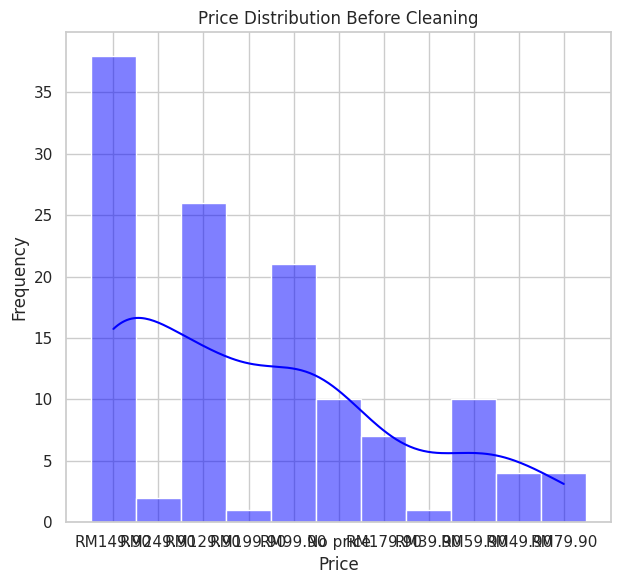

In [ ]:
#Before Cleaning data
# Plot distribution of prices before cleaning
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(uniqlo['Price'], kde=True, color='blue', bins=30)
plt.title('Price Distribution Before Cleaning')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

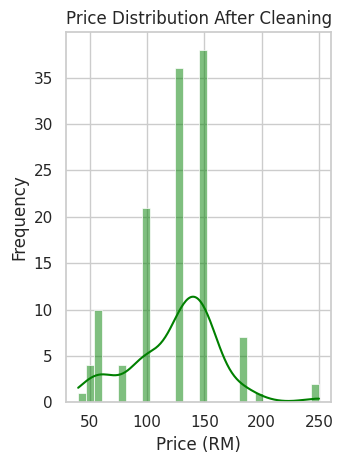

In [ ]:
plt.subplot(1, 2, 2)
sns.histplot(df['Price'], kde=True, color='green', bins=30)
plt.title('Price Distribution After Cleaning')
plt.xlabel('Price (RM)')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()

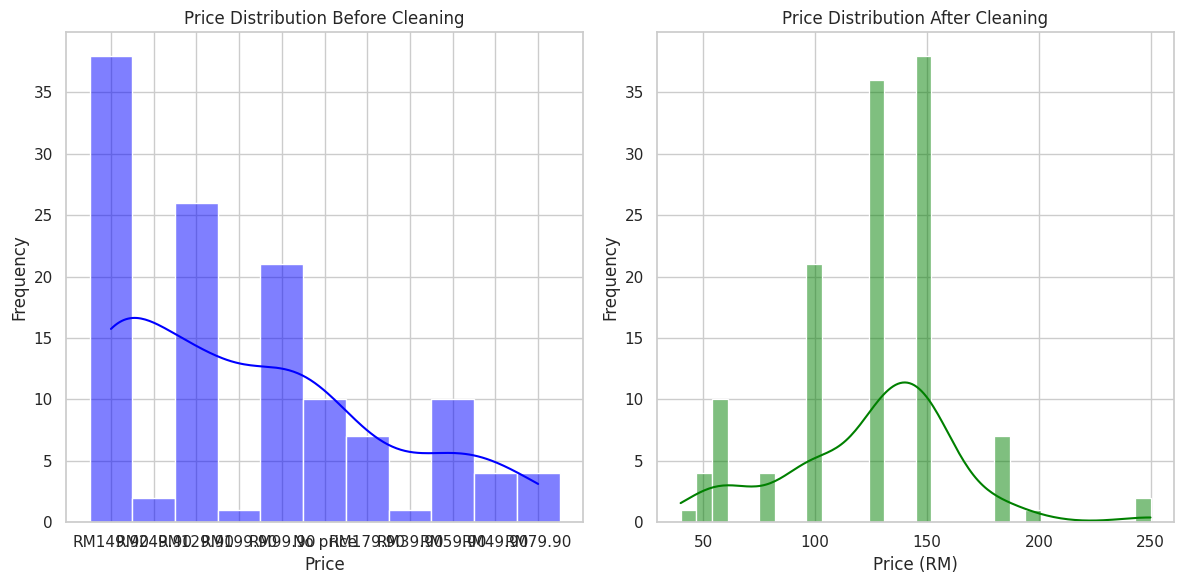

In [ ]:
# Plot distribution of prices before cleaning
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(uniqlo['Price'], kde=True, color='blue', bins=30)
plt.title('Price Distribution Before Cleaning')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Plot distribution of prices after cleaning
plt.subplot(1, 2, 2)
sns.histplot(df['Price'], kde=True, color='green', bins=30)
plt.title('Price Distribution After Cleaning')
plt.xlabel('Price (RM)')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()


# Store before cleaning and after cleaning

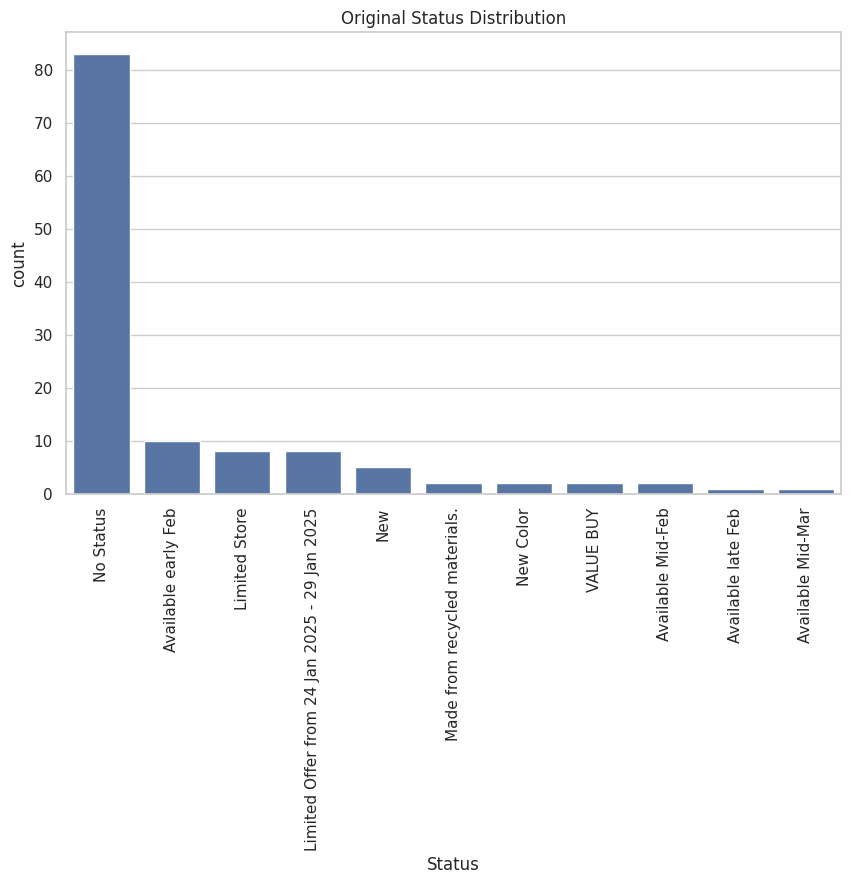

In [ ]:
# Store the original status for comparison
uniqlo['Status'] = uniqlo['Status']

# Before cleaning: Countplot of the original status (raw text)
plt.figure(figsize=(10, 6))
sns.countplot(data=uniqlo, x='Status', order=uniqlo['Status'].value_counts().index)
plt.title('Original Status Distribution')
plt.xticks(rotation=90)  # Rotate x-axis labels to fit the text
plt.show()

<ipython-input-175-c90b45bc3936>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_counts.index, y=status_counts.values, palette="Blues_r")


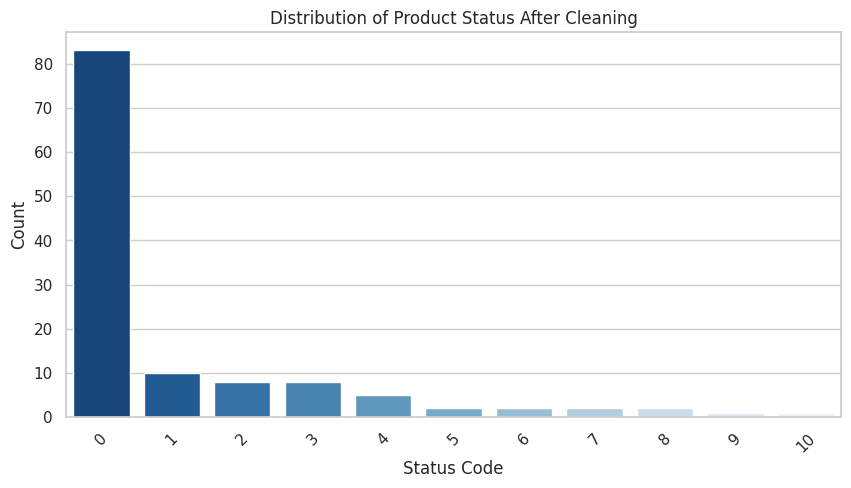

In [ ]:
#from ctypes import DEFAULT_MODE
# Set plot style
plt.figure(figsize=(10, 5))
#sns.set_theme(style="whitegrid")

# Count occurrences of each status
status_counts = df['Status'].value_counts().sort_index()

# Create bar plot
sns.barplot(x=status_counts.index, y=status_counts.values, palette="Blues_r")

# Add labels and title
plt.xlabel("Status Code")
plt.ylabel("Count")
plt.title("Distribution of Product Status After Cleaning")
plt.xticks(rotation=45)
plt.show()

# Data product name by review count before cleaning and after cleaning

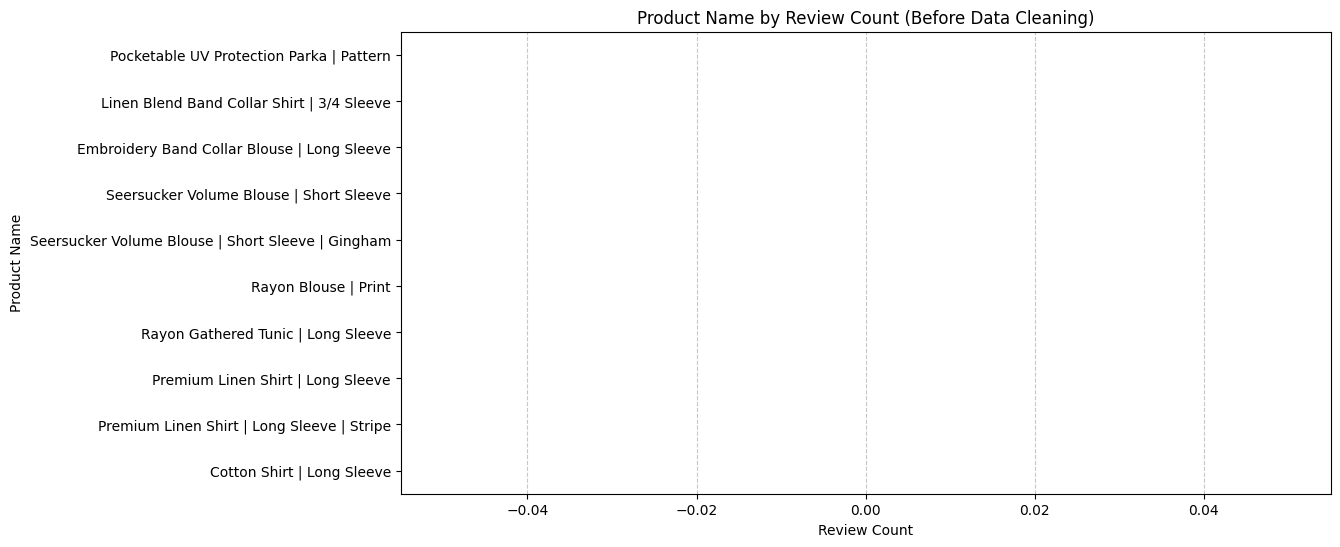

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the raw dataset
df_before = pd.read_csv("uniqlo2025.csv")

# Convert "Review Count" to numeric, handling missing or non-numeric values
df_before["Review Count"] = pd.to_numeric(df_before["Review Count"].str.replace(",", "", regex=True), errors="coerce")

# Fill NaN values with 0 (Fixed Warning)
df_before["Review Count"] = df_before["Review Count"].fillna(0)

# Convert to integer
df_before["Review Count"] = df_before["Review Count"].astype(int)

# Sort by Review Count (Top 10 products)
df_before_sorted = df_before.sort_values(by="Review Count", ascending=False).head(10)

# Plot Before Cleaning
plt.figure(figsize=(12, 6))
sns.barplot(x=df_before_sorted["Review Count"], y=df_before_sorted["Name"], hue=df_before_sorted["Name"], palette="coolwarm", legend=False)

plt.xlabel("Review Count")
plt.ylabel("Product Name")
plt.title("Product Name by Review Count (Before Data Cleaning)")
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.show()


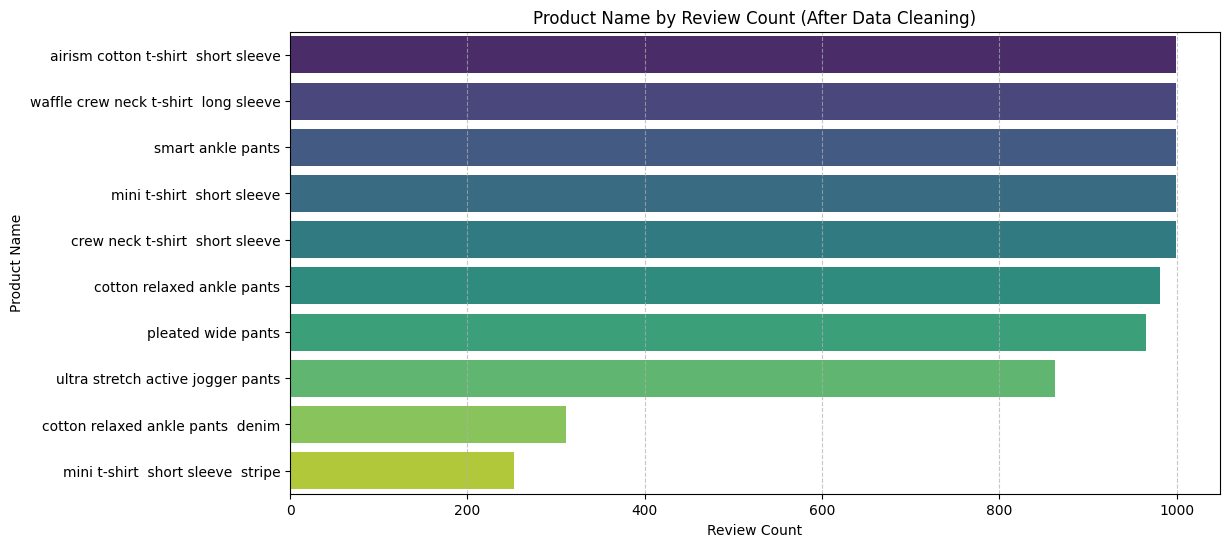

In [13]:

# Load the cleaned dataset
df_after = pd.read_csv("cleaned_uniqlo.csv")

# Convert "Review Count" to string first before replacing commas
df_after["Review Count"] = df_after["Review Count"].astype(str).str.replace(",", "", regex=True)

# Convert "Review Count" to numeric, handling missing or non-numeric values
df_after["Review Count"] = pd.to_numeric(df_after["Review Count"], errors="coerce")

# Fill NaN values with 0 (Fixed Warning)
df_after["Review Count"] = df_after["Review Count"].fillna(0)

# Convert to integer
df_after["Review Count"] = df_after["Review Count"].astype(int)

# Sort by Review Count (Top 10 products)
df_after_sorted = df_after.sort_values(by="Review Count", ascending=False).head(10)

# Plot After Cleaning
plt.figure(figsize=(12, 6))
sns.barplot(x=df_after_sorted["Review Count"], y=df_after_sorted["Name"], hue=df_after_sorted["Name"], palette="viridis", legend=False)

plt.xlabel("Review Count")
plt.ylabel("Product Name")
plt.title("Product Name by Review Count (After Data Cleaning)")
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.show()
